# Gaining Insights for the leading OTT platform to help them deciding the type of content to produce for different geographies.
**<font color=green>*Shailendra Pratap Singh - Dec'22 MWF - Batch***

## <span style='font-family:Georgia'> Table of Content

### 1. Section 1
* [Case Study](#1) 

### 2. Section 2
* [Importing Libraries](#2)
* [Reading the CSV file](#3)

### 3. Section 3
* [1. Problem Defination](#4)
* [2. Observation on the data](#5)
* [3. Non-Graphical Analysis](#6)
* [4. Visual Analysis](#7)
* [5. Missing Value and Outlier check](#8)
* [6. Insights](#9)
* [7. Business Insights](#10)
* [8. Recommendations](#11)

## Case Study <a id = "1"></a>

### About Company

The company is one of the most popular media and video streaming platforms. They have over 10,000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

### Dataset

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

    Show_id: Unique ID for every Movie / Tv Show
    Type: Identifier - A Movie or TV Show
    Title: Title of the Movie / Tv Show
    Director: Director of the Movie
    Cast: Actors involved in the movie/show
    Country: Country where the movie/show was produced
    Date_added: Date it was added on Netflix
    Release_year: Actual Release year of the movie/show
    Rating: TV Rating of the movie/show
    Duration: Total Duration - in minutes or number of seasons
    Listed_in: Genre
    Description: The summary description

## Importing Libraries <a id = "2"> </a>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset <a id = "3"> </a>

In [4]:
nd = pd.read_csv("netflix.csv")
nd.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Q1. Defining Problem Statement and Analysing basic metrics <a id = "4"></a>

### 1.1 Problem Defination

1. Netflix is looking to get insights, which is backed by data, so that they could able to strategise their future plans to grow their business.
2. Netflix is looking to plan their future shows/movies such that they encourge more engagement thereby increase their revenue. For that they want to find insights such as:
    * Which type of shows/movies to release in different countries.
    * The ideal timings to release any show in different countries.
    * Content of which actors/directors has better probability to get success in different countries.
    * Which are the best set of Genre for different countries.

### 1.2 Initial Data Exploration <a id = "4"></a>

In [106]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [107]:
nd.describe(include = "object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [108]:
nd.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 1.3 Observations 
* The dataset consists of 12 columns and 8,807 rows.
* There is some pre-processiong required - Like unnesting of columns, conversion of dtype etc

## Q2. Observations on the following <a id = "5"></a>
- shape of data, 
- data types of all the attributes, 
- conversion of categorical attributes to 'category' (If required), 
- missing value detection, statistical summary

### 2.1 Observations

#### 2.1.1. Shape of the data

In [109]:
nd.shape

(8807, 12)

* The dataset consists of 8,807 rows and 12 columns.

#### 2.1.2. Data types of all the attributes

In [110]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* In the dataset all the given columns are of Object datatype except ```release_year```
* The ```date_added``` column consists of dates thus datatype need to be changes to ```datetime```
* The ```duration``` column consists of duration of the movie or TV Show, we can extract the numerical part from this column

#### 2.1.3. Conversion of categorical attributes to 'category' (If required)



In [111]:
nd.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [112]:
nd[["type", "rating"]] = nd[["type", "rating"]].astype("category")

#### 2.1.4 Missing value detection, statistical summary, and treatment 

In [113]:
# nd = pd.read_csv("netflix.csv")

#### 1. Handling Missing Values in the `duration`, `rating`, and `date_added` columns

In [114]:
nd.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Treatment for duration column

In [115]:
nd.loc[nd["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [116]:
### Looks like a misplacement, the Values for durations are entered in the rating column

In [117]:
### Setting the misplaced duration value from rating column
nd_durr =nd.loc[nd["duration"].isna()]
ids = nd_durr["show_id"].index

In [118]:
nd["duration"].fillna(nd["rating"], inplace=True)

In [119]:
nd["duration"].isna().sum()

0

#### Treatment for rating column

In [120]:
### deleting these misplaces values from rating column
nd.loc[ids,"rating"] = np.nan

In [121]:
### Imputing with the group mode
nd["rating"] = nd.groupby(["type", "listed_in"])["rating"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [122]:
nd["rating"].isna().sum()

0

#### Treatment for `date_added` column

In [123]:
nd["date_added"].fillna(nd["release_year"], inplace=True)

In [124]:
nd["date_added"].isna().sum()

0

In [125]:
nd.isnull().sum()/nd.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [126]:
### Will treat other three missing values columns after preprocessing

### 2.2. Observations

1. Majorly, the dataset consists of catagorical data 
2. Dataset has significant missing values in below columns that need to be treated
    * director - 29.9%
    * cast - 9.37%
    * country - 9.43%
3. Unnesting need to be done for 4 columns - cast, director, country, listed_in
4. Around 70% of the content is Movies and another 30% is TV Shows
5. date_added column is of object datatype which need to be converted to datetime datatype

## Q3. Non-Graphical Analysis: <a id = "6"></a>
- Value counts
- unique attributes

In [8]:
nd["rating"].value_counts().to_frame().reset_index().rename(columns = {'rating':"Rating", "count":"Count of Titles"})

,Rating,Count of Titles
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [10]:
nd["type"].value_counts().reset_index().rename(columns = {'type':"ContentType", "count":"Count of Titles"})

,ContentType,Count of Titles
0,Movie,6131
1,TV Show,2676


### 3.1 Pre-Processing of Data

As we have seen in the above sections, data pre-processing is required. To perform data analysis, we'll do unnesting, datatype conversion, some aditional adjustments.


#### 3.1.1. Unnesting

In [129]:
# nd = pd.read_csv("netflix.csv")

* As the values in ```director```,```cast```, ```country```, and ```listed_in``` as separated by comma, we can easily split these value with delimiter ",". This will give us a list of all the values at respective cells and columns

In [130]:
nd["cast"], nd["director"],\
nd["country"], nd["listed_in"] = nd["cast"].str.split(', '), nd["director"].str.split(', '),\
                                 nd["country"].str.split(', '), nd["listed_in"].str.split(', ')
nd.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...


* Now we can use explode() function to split these values as per there rows

In [131]:
df = nd.explode("cast").explode("director").explode("country").explode("listed_in")

In [132]:
df.shape

(201991, 12)

#### 3.1.2. Converting ```date_added``` column to Datetime and extract ```Month``` and ```Year``` from that for future analysis

In [133]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [134]:
df["month_added"] = pd.to_datetime(df["date_added"]).dt.month.astype('Int64')

In [135]:
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year.astype('Int64')

In [136]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


#### 3.2 ```values_count``` and ```nuniques``` 

In [137]:
df.describe(include = "object").T

,count,unique,top,freq
show_id,201991,8807,s7165,700
title,201991,8807,Kahlil Gibran's The Prophet,700
director,151348,4993,Martin Scorsese,419
cast,199845,36439,Liam Neeson,161
country,190094,127,United States,59349
duration,201991,220,1 Season,35035
listed_in,201991,42,Dramas,29775
description,201991,8775,A troubled young girl and her mother find sola...,700


## Analysis

In [138]:
movies = df.loc[df["type"] == "Movie"]
shows = df.loc[df["type"] == "TV Show"]

### Top Actors

In [139]:
m_actors = movies.groupby(["cast", "type"])["show_id"].nunique().sort_values(ascending = False).reset_index()
m_actors.columns = ["actor","type", "count"]
m_actors = m_actors.iloc[1:11,:]
m_actors

,actor,type,count
1,Shah Rukh Khan,Movie,35
2,Naseeruddin Shah,Movie,32
3,Akshay Kumar,Movie,30
4,Om Puri,Movie,30
5,Paresh Rawal,Movie,28
6,Julie Tejwani,Movie,28
7,Amitabh Bachchan,Movie,28
8,Rupa Bhimani,Movie,27
9,Boman Irani,Movie,27
10,Kareena Kapoor,Movie,25


In [140]:
s_actors = shows.groupby(["cast", "type"])["show_id"].nunique().sort_values(ascending = False).reset_index()
s_actors.columns = ["actor","type", "count"]
s_actors = s_actors.iloc[1:11,:]
s_actors

,actor,type,count
1,Yuki Kaji,TV Show,19
2,Daisuke Ono,TV Show,17
3,Ai Kayano,TV Show,17
4,Junichi Suwabe,TV Show,17
5,Yuichi Nakamura,TV Show,16
6,Jun Fukuyama,TV Show,15
7,Yoshimasa Hosoya,TV Show,15
8,David Attenborough,TV Show,14
9,Vincent Tong,TV Show,13
10,Takehito Koyasu,TV Show,13


### Top Directors

In [141]:
m_directors = movies.groupby(["director", "type"])["show_id"].nunique().sort_values(ascending = False).reset_index()
m_directors.columns = ["director", "type", "count"]
m_directors = m_directors.iloc[1:11,:]
m_directors

,director,type,count
1,Jan Suter,Movie,21
2,Raúl Campos,Movie,19
3,Suhas Kadav,Movie,16
4,Jay Karas,Movie,15
5,Marcus Raboy,Movie,15
6,Cathy Garcia-Molina,Movie,13
7,Martin Scorsese,Movie,12
8,Jay Chapman,Movie,12
9,Youssef Chahine,Movie,12
10,Steven Spielberg,Movie,11


In [142]:
s_directors = shows.groupby(["director", "type"])["show_id"].nunique().sort_values(ascending = False).reset_index()
s_directors.columns = ["director", "type", "count"]
s_directors = s_directors.iloc[1:11,:]
s_directors

,director,type,count
1,Ken Burns,TV Show,3
2,Stan Lathan,TV Show,2
3,Joe Berlinger,TV Show,2
4,Rob Seidenglanz,TV Show,2
5,Shin Won-ho,TV Show,2
6,Jung-ah Im,TV Show,2
7,Gautham Vasudev Menon,TV Show,2
8,Hsu Fu-chun,TV Show,2
9,Iginio Straffi,TV Show,2
10,Lynn Novick,TV Show,2


### Top ```Actor-Director``` pair

In [143]:
ad_pair = df.groupby(by = ["director", 'cast'])["show_id"].nunique().sort_values(ascending = False).reset_index()
ad_pair.columns = ["director","actor", "count"]
ad_pair = ad_pair.head(10)
ad_pair

,director,actor,count
0,Rajiv Chilaka,Julie Tejwani,19
1,Rajiv Chilaka,Rajesh Kava,19
2,Rajiv Chilaka,Jigna Bhardwaj,18
3,Rajiv Chilaka,Rupa Bhimani,18
4,Rajiv Chilaka,Vatsal Dubey,16
5,Rajiv Chilaka,Swapnil,13
6,Rajiv Chilaka,Mousam,13
7,Suhas Kadav,Saurav Chakraborty,8
8,Yılmaz Erdoğan,Yılmaz Erdoğan,7
9,S.S. Rajamouli,Sathyaraj,7


### Major Ratings

In [144]:
ratings = df.groupby(["rating"])["show_id"].nunique().sort_values(ascending = False).reset_index()
ratings.columns = ["rating", "count"]
ratings

,rating,count
0,TV-MA,3207
1,TV-14,2161
2,TV-PG,863
3,R,800
4,PG-13,490
5,TV-Y7,335
6,TV-Y,311
7,PG,287
8,TV-G,220
9,NR,80


### Top Content producer Countries

In [145]:
countries = df.groupby(["country"])["show_id"].nunique().sort_values(ascending = False).reset_index()
countries.columns = ["country", "count"]
countries = countries.head(10)
countries

,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [146]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

### Top Genre - Countrywise

In [147]:
genre = df.groupby(["listed_in", "type"])["show_id"].nunique().sort_values(ascending = False).reset_index()
genre.columns = ["genre", "type", "count"]
genre = genre.head(10)
genre

,genre,type,count
0,International Movies,Movie,2752
1,Dramas,Movie,2427
2,Comedies,Movie,1674
3,International TV Shows,TV Show,1351
4,Documentaries,Movie,869
5,Action & Adventure,Movie,859
6,TV Dramas,TV Show,763
7,Independent Movies,Movie,756
8,Children & Family Movies,Movie,641
9,Romantic Movies,Movie,616


### Duration - Countrywise

In [148]:
df[["duration_val", "Sessions/Min"]] = df["duration"].str.split(" ", expand = True)
df["duration_val"] = df["duration_val"].astype("int64")

#### For Movies

In [149]:
movies = df.loc[df["type"] == "Movie"]
movies.describe().T.iloc[-1:,[1,3,-1]]

,mean,min,max
duration_val,106.85579,3.0,312.0


In [150]:
short_films = movies.loc[movies["duration_val"] <= 60]["title"].nunique()
long_films = movies.loc[movies["duration_val"] >= 60]["title"].nunique()

print("Number of Short Duration Films: ",short_films, "Number of Long Duration Movies: ", long_films, sep= "\n")

Number of Short Duration Films: 
487
Number of Long Duration Movies: 
5673


There are 487 short film and 5,673 full duration movies

#### For TV Show

In [151]:
shows = df.loc[df["type"] == "TV Show"]
shows.describe().T.iloc[-1:,[1,3,-1]]

,mean,min,max
duration_val,1.928101,1.0,17.0


In [152]:
shows.loc[shows.duration_val == 17]["title"].unique()

array(["Grey's Anatomy"], dtype=object)

In [153]:
long_shows = shows.loc[shows.duration_val >= 10]["title"].nunique()
print("Number of TV Shows with 10 or more seasons: ", long_shows)

Number of TV Shows with 10 or more seasons:  17


* TV Shows are on an average of 2 seasons
* Maximum seasons = 17 of <b> `"Grey's Anatomy"` </b> TV Show

## Q4. Visual Analysis <a id = "7"></a>
- Univariate
- Bivariate after pre-processing of the data

### Content Type

In [154]:
nd["type"].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

<AxesSubplot:ylabel='type'>

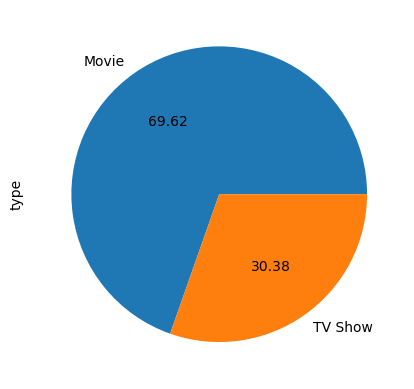

In [155]:
nd["type"].value_counts().plot(kind= "pie", autopct="%.2f")

### How has the number of movies released per year changed over the years?

In [156]:
df_m = df.loc[df["type"]=="Movie"]

Text(0, 0.5, 'Count of Movies')

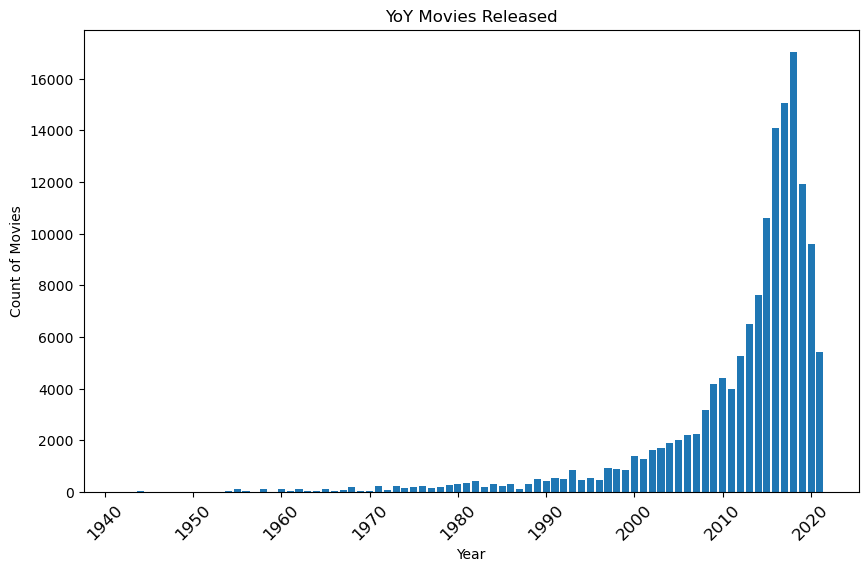

In [157]:
plt.figure(figsize = (10,6))
plt.bar(df_m.groupby(["release_year"])["show_id"].count().index, df_m.groupby(["release_year"])["show_id"].count())
plt.title("YoY Movies Released")
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Count of Movies")

In [158]:
# plt.figure(figsize= (10,8))
# sns.histplot(data = df, x = "release_year", hue = "type")

Text(0.5, 1.0, 'YoY Content addition on Netflix Platform')

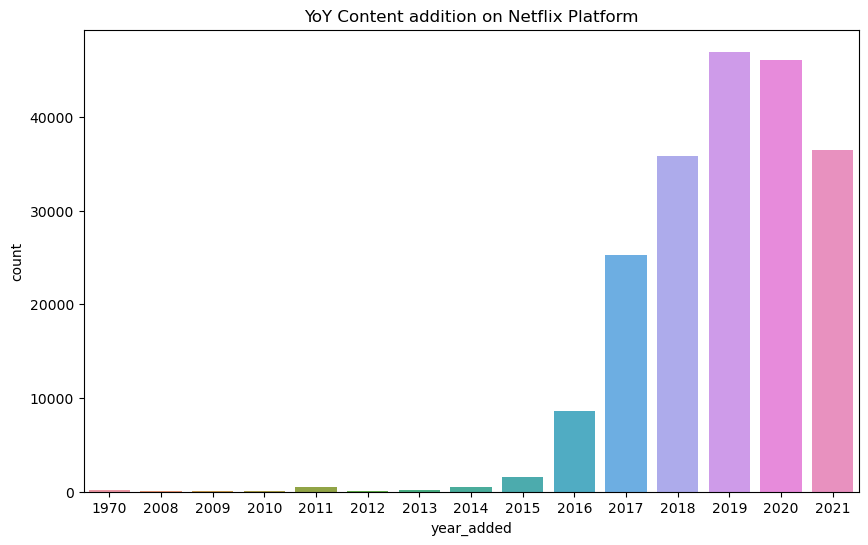

In [159]:
plt.figure(figsize=(10,6))
sns.countplot(x='year_added',data=df)
plt.title("YoY Content addition on Netflix Platform")

### Comparison of tv shows vs. movies wrt countries
    

In [160]:
typ = df.groupby(["year_added", "type"])["title"].nunique()

In [161]:
typ = typ.reset_index()
typ

,year_added,type,title
0,1970,Movie,0
1,1970,TV Show,10
2,2008,Movie,1
3,2008,TV Show,1
4,2009,Movie,2
5,2009,TV Show,0
6,2010,Movie,1
7,2010,TV Show,0
8,2011,Movie,13
9,2011,TV Show,0


In [162]:
typ = pd.pivot(
    index = ["year_added"], 
    data = typ, columns = ["type"], 
    values = "title").reset_index()

In [163]:
typ["movie_pct"] = (typ["Movie"]/(typ["Movie"] + typ["TV Show"])).round(2)
typ["TV Show_pct"] = 1-typ["movie_pct"]

In [164]:
typ_c = typ.iloc[:-6:-1,[0,3,4]]
# typ_c["year_added"] = typ_c["year_added"].astype("object")
typ_c

type,year_added,movie_pct,TV Show_pct
14,2021,0.66,0.34
13,2020,0.68,0.32
12,2019,0.71,0.29
11,2018,0.75,0.25
10,2017,0.71,0.29


In [165]:
df1 = df.copy()
df1.head(2)
df1["year_added"] = df1["year_added"].astype("object")

<AxesSubplot:xlabel='year_added', ylabel='count'>

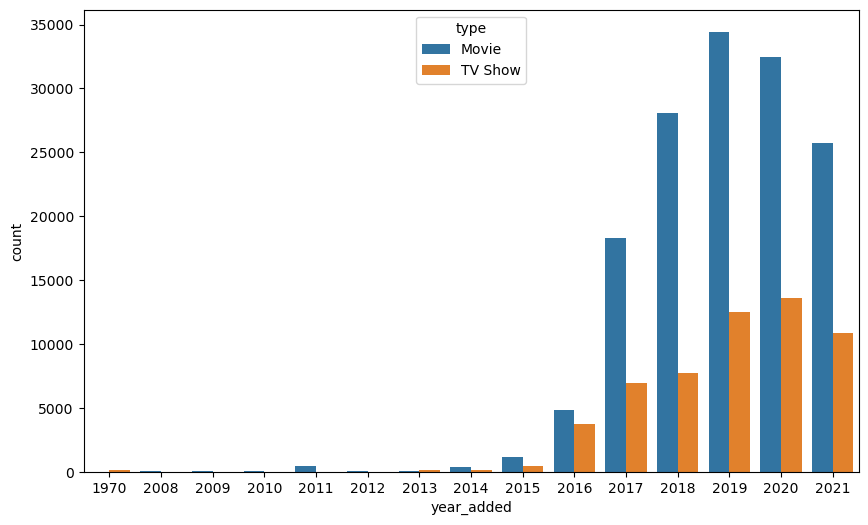

In [166]:
plt.figure(figsize = (10,6))
sns.countplot(data = df1, x = "year_added" , hue = "type")

### Observations

1. There is no significant and noticable increase in the TV Shows in comparision to Movies in recent years

### What is the best time to launch a TV show?


In [167]:
df.loc[df["type"] == "TV Show"].groupby(["month_added"])["title"].nunique().sort_values(ascending = False)

month_added
12    266
7     262
9     251
6     236
8     236
10    215
4     214
3     213
11    207
1     202
5     193
2     181
Name: title, dtype: int64

Text(0.5, 1.0, 'Netflix content addition in different months')

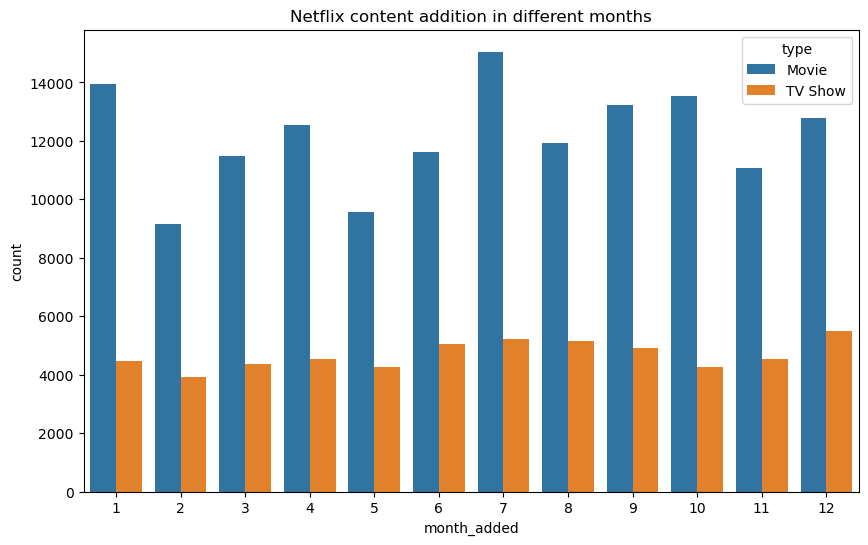

In [168]:
plt.figure(figsize= (10,6))
sns.countplot(data = df, x = "month_added", hue= "type")
plt.title("Netflix content addition in different months")

1. Most of the movies and TV shows released in December, July, and September
2. We do not have any such data which suggest whether releasing the show on that particular month was successful or not, thus it can't be concluded that release a show in a particular month will have better chance of getting better customer engagement.

###    4. Analysis of actors/directors/rating/content/genre of different types of shows/movies.

In [169]:
m_actors

,actor,type,count
1,Shah Rukh Khan,Movie,35
2,Naseeruddin Shah,Movie,32
3,Akshay Kumar,Movie,30
4,Om Puri,Movie,30
5,Paresh Rawal,Movie,28
6,Julie Tejwani,Movie,28
7,Amitabh Bachchan,Movie,28
8,Rupa Bhimani,Movie,27
9,Boman Irani,Movie,27
10,Kareena Kapoor,Movie,25


In [170]:
s_actors

,actor,type,count
1,Yuki Kaji,TV Show,19
2,Daisuke Ono,TV Show,17
3,Ai Kayano,TV Show,17
4,Junichi Suwabe,TV Show,17
5,Yuichi Nakamura,TV Show,16
6,Jun Fukuyama,TV Show,15
7,Yoshimasa Hosoya,TV Show,15
8,David Attenborough,TV Show,14
9,Vincent Tong,TV Show,13
10,Takehito Koyasu,TV Show,13


Text(0.5, 1.0, 'Top Actors - Movies')

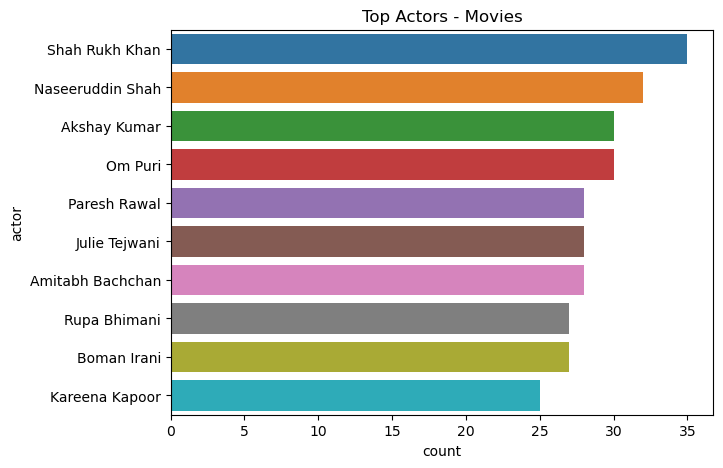

In [171]:
plt.figure(figsize= (7,5))
sns.barplot(data = m_actors, x = "count", y = "actor")
plt.title("Top Actors - Movies")

Text(0.5, 1.0, 'Top Actors - TV Show')

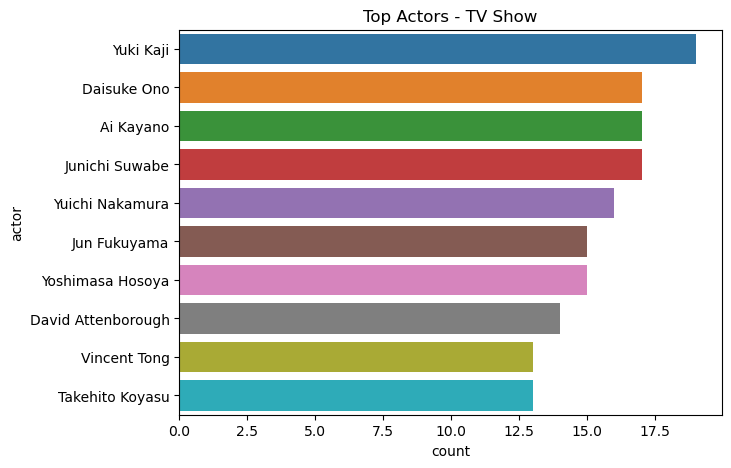

In [172]:
plt.figure(figsize= (7,5))
sns.barplot(data = s_actors, x = "count", y = "actor")
plt.title("Top Actors - TV Show")

Text(0.5, 1.0, 'Top Directors- Movies')

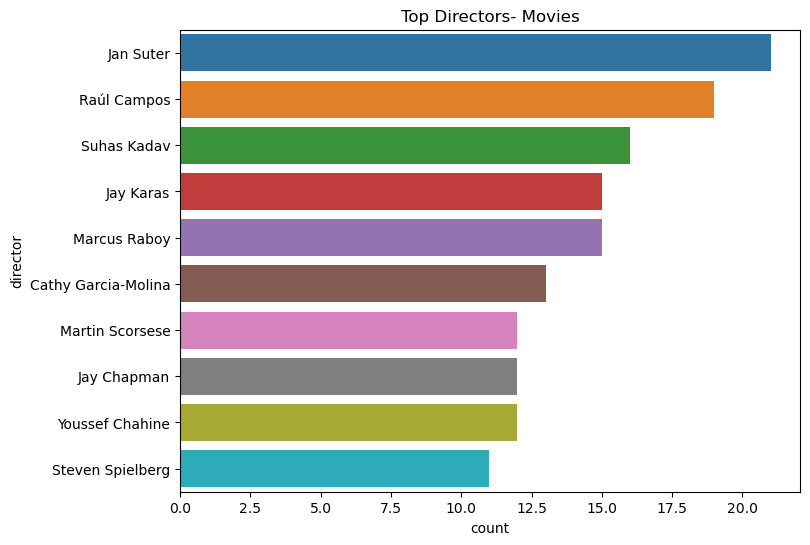

In [173]:
plt.figure(figsize= (8,6))
sns.barplot(data = m_directors, x = "count", y = "director")
plt.title("Top Directors- Movies")

Text(0.5, 1.0, 'Top Directors - TV Shows')

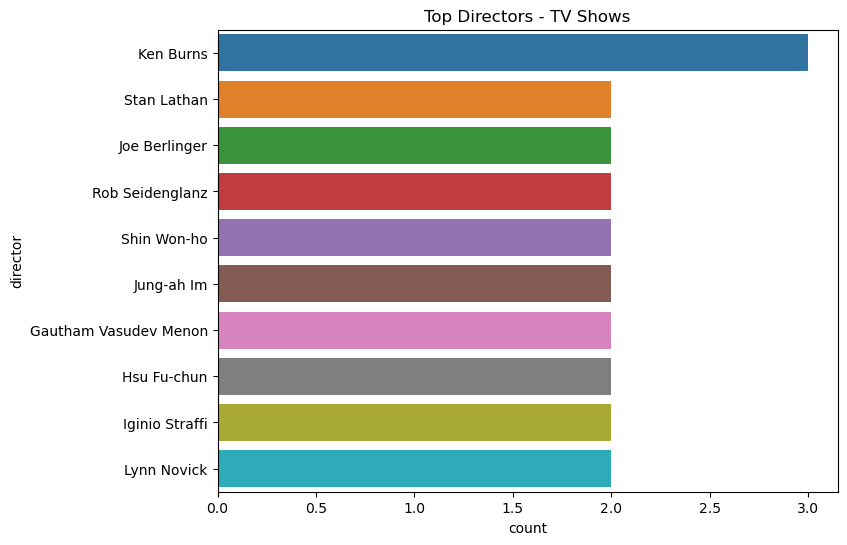

In [174]:
plt.figure(figsize= (8,6))
sns.barplot(data = s_directors, x = "count", y = "director")
plt.title("Top Directors - TV Shows")

In [175]:
ad_pair["ad_pair"] = ad_pair["director"] + " - " + ad_pair["actor"]
ad_pair

,director,actor,count,ad_pair
0,Rajiv Chilaka,Julie Tejwani,19,Rajiv Chilaka - Julie Tejwani
1,Rajiv Chilaka,Rajesh Kava,19,Rajiv Chilaka - Rajesh Kava
2,Rajiv Chilaka,Jigna Bhardwaj,18,Rajiv Chilaka - Jigna Bhardwaj
3,Rajiv Chilaka,Rupa Bhimani,18,Rajiv Chilaka - Rupa Bhimani
4,Rajiv Chilaka,Vatsal Dubey,16,Rajiv Chilaka - Vatsal Dubey
5,Rajiv Chilaka,Swapnil,13,Rajiv Chilaka - Swapnil
6,Rajiv Chilaka,Mousam,13,Rajiv Chilaka - Mousam
7,Suhas Kadav,Saurav Chakraborty,8,Suhas Kadav - Saurav Chakraborty
8,Yılmaz Erdoğan,Yılmaz Erdoğan,7,Yılmaz Erdoğan - Yılmaz Erdoğan
9,S.S. Rajamouli,Sathyaraj,7,S.S. Rajamouli - Sathyaraj


Text(0.5, 1.0, 'Top Director_Actor Pair')

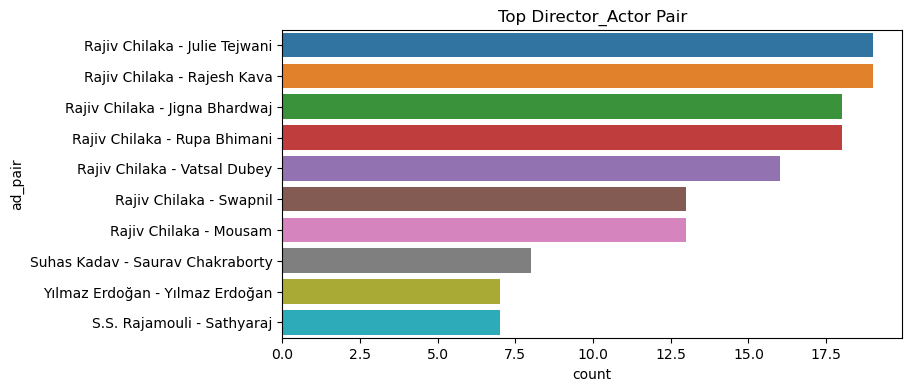

In [176]:
plt.figure(figsize= (8,4))
sns.barplot(data = ad_pair, x = "count", y = "ad_pair")
plt.title("Top Director_Actor Pair")

Text(0.5, 1.0, 'Genre')

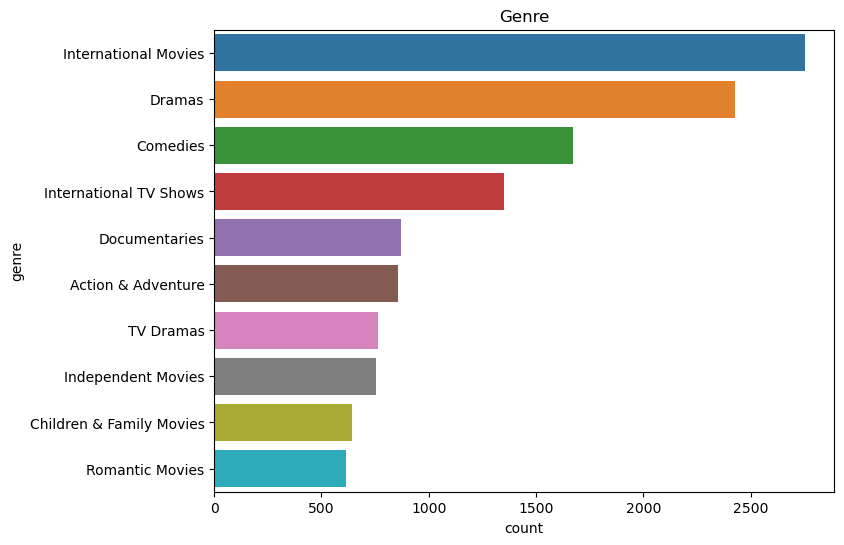

In [177]:
plt.figure(figsize= (8,6))
sns.barplot(data = genre, y= "genre", x = "count")
plt.title("Genre")


Text(0.5, 1.0, 'Ratings')

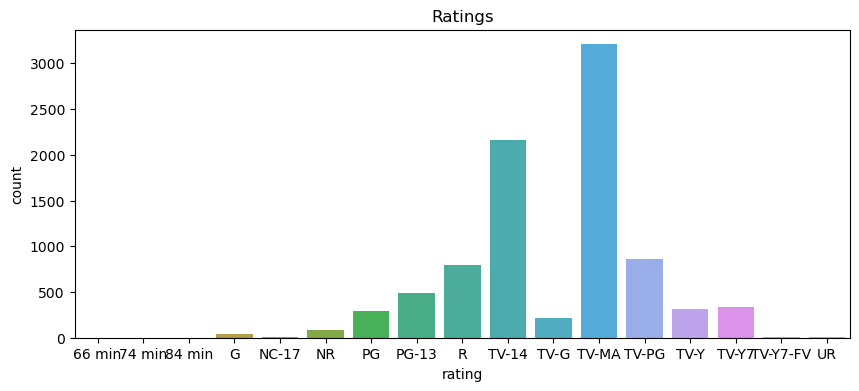

In [178]:
plt.figure(figsize= (10,4))
sns.barplot(data = ratings, x= "rating", y = "count")
plt.title("Ratings")

### Understanding what content is available in different countries

In [179]:
cntry = df.groupby(["country"])["title"].nunique().sort_values(ascending = False)
cntry = cntry.reset_index()
cntry

,country,title
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Kazakhstan,1
123,Jamaica,1
124,Slovakia,1
125,Somalia,1


In [180]:
cntry[:20]

,country,title
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


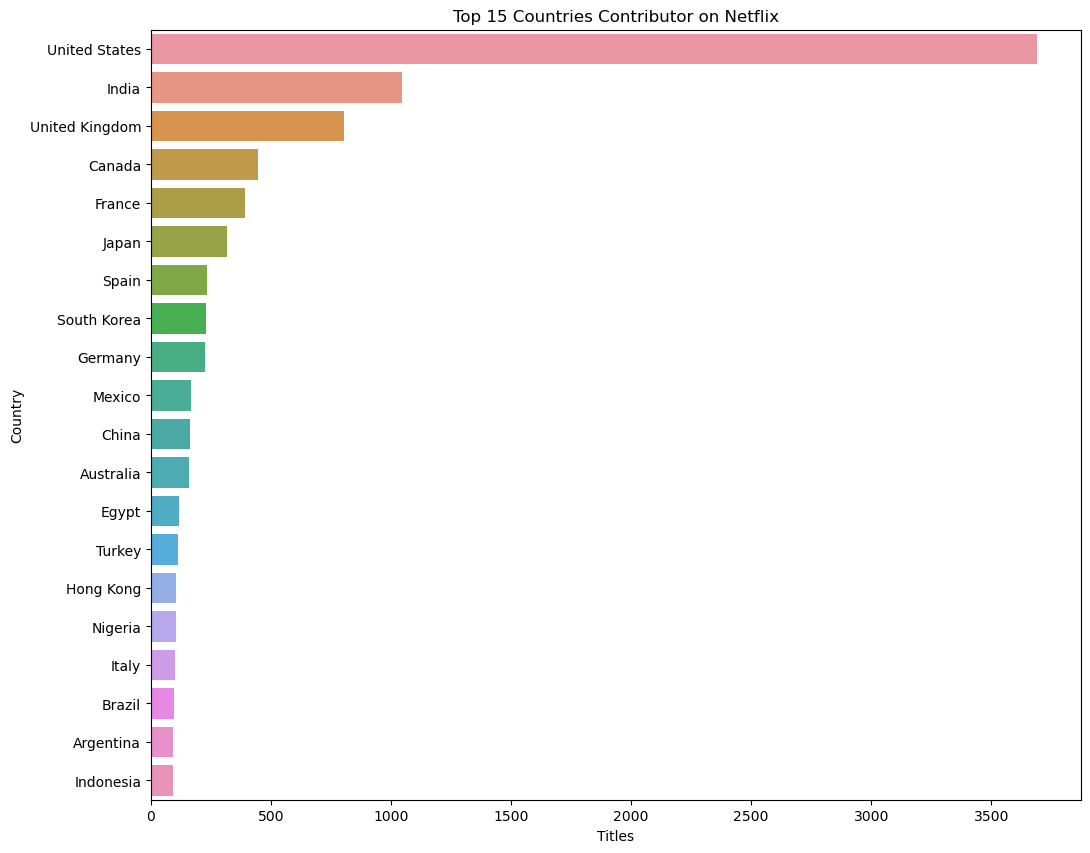

In [181]:
plt.figure(figsize=(12,10))
sns.barplot(y = cntry.country[:20], x = cntry.title)
plt.title("Top 15 Countries Contributor on Netflix")
plt.xlabel("Titles")
plt.ylabel("Country")
plt.show()

In [182]:
top_cntry = cntry.country[:5].values
top_cntry

array(['United States', 'India', 'United Kingdom', 'Canada', 'France'],
      dtype=object)

In [183]:
df_tc = df.loc[df["country"].isin(top_cntry)]

In [184]:
genre = df_tc.groupby(["country", "listed_in"])["title"].nunique().reset_index()
genre = genre.sort_values(by = ["country", "title"], ascending = [True, False])
gnr = genre.groupby("country").head(3)
gnr

,country,listed_in,title
5,Canada,Comedies,94
10,Canada,Dramas,82
3,Canada,Children & Family Movies,80
50,France,International Movies,207
46,France,Dramas,167
49,France,Independent Movies,73
85,India,International Movies,864
81,India,Dramas,662
76,India,Comedies,323
108,United Kingdom,British TV Shows,225


<AxesSubplot:xlabel='country', ylabel='title'>

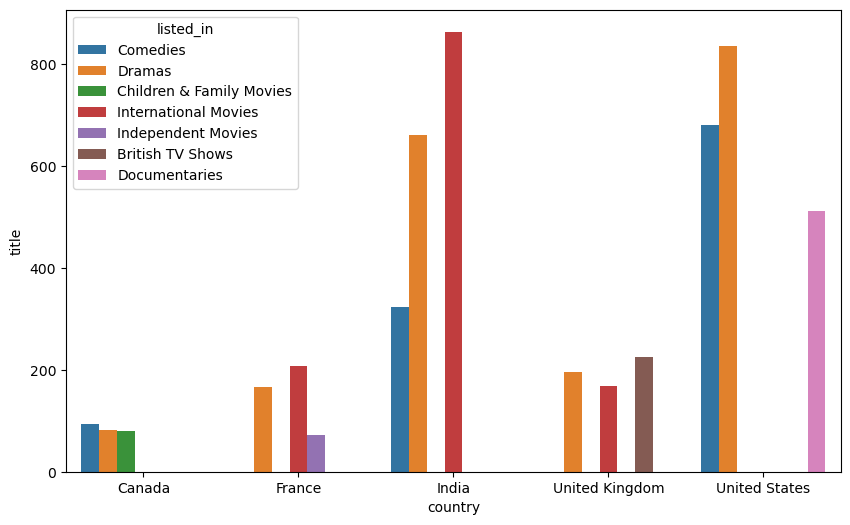

In [185]:
plt.figure(figsize = (10,6))
sns.barplot(data = gnr, x='country', y = "title" , hue='listed_in' )

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country
1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis
2. For categorical variable(s): Boxplot
3. For correlation: Heatmaps, Pairplots

## Q5. Missing Value & Outlier check <a id = "8"></a>
(Treatment optional) 

### 5.1 Missing values and outliers detection

In [186]:
df.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
year_added          0
duration_val        0
Sessions/Min        0
dtype: int64

In [187]:
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        25.071909
cast             1.062424
country          5.889866
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
month_added      0.000000
year_added       0.000000
duration_val     0.000000
Sessions/Min     0.000000
dtype: float64

In [188]:
df.loc[df["date_added"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       0 non-null      object        
 1   type          0 non-null      category      
 2   title         0 non-null      object        
 3   director      0 non-null      object        
 4   cast          0 non-null      object        
 5   country       0 non-null      object        
 6   date_added    0 non-null      datetime64[ns]
 7   release_year  0 non-null      int64         
 8   rating        0 non-null      category      
 9   duration      0 non-null      object        
 10  listed_in     0 non-null      object        
 11  description   0 non-null      object        
 12  month_added   0 non-null      Int64         
 13  year_added    0 non-null      Int64         
 14  duration_val  0 non-null      int64         
 15  Sessions/Min  0 non-null      object        
dtypes:

### Exploration of unnested dataframe

In [189]:
df.shape

(201991, 16)

In [190]:
df.describe(include = object).T

,count,unique,top,freq
show_id,201991,8807,s7165,700
title,201991,8807,Kahlil Gibran's The Prophet,700
director,151348,4993,Martin Scorsese,419
cast,199845,36439,Liam Neeson,161
country,190094,127,United States,59349
duration,201991,220,1 Season,35035
listed_in,201991,42,Dramas,29775
description,201991,8775,A troubled young girl and her mother find sola...,700
Sessions/Min,201991,3,min,145843


In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,201991.0,2013.452891,9.003933,1925.0,2012.0,2016.0,2019.0,2021.0
month_added,201991.0,6.631909,3.444674,1.0,4.0,7.0,10.0,12.0
year_added,201991.0,2018.926873,2.068777,1970.0,2018.0,2019.0,2020.0,2021.0
duration_val,201991.0,77.688749,51.488067,1.0,4.0,95.0,112.0,312.0


### 5.2 Missing Values and Outliers Treatment

In [192]:
# df["rating"] = df.groupby(["type", "listed_in"])["rating"].apply(lambda x: x.fillna(x.mode().iloc[0]))
# df["country"] = df.groupby(["type", "listed_in"])["country"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [193]:
# df.dropna(subset = ["date_added", "rating", "duration"], inplace = True)

In [194]:
df['cast'].fillna("Unknown Actor", inplace = True)
df['director'].fillna("Unknown Director", inplace = True)
df['country'].fillna("Unknown Country", inplace = True)

In [195]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
duration_val    0
Sessions/Min    0
dtype: int64

In [196]:
df_temp = df.copy()

In [197]:
df_temp[["durr", "Sessions/Min"]] = df_temp["duration"].str.split(" ", expand = True)
df_temp["durr"] = df_temp["durr"].astype("int64")

<AxesSubplot:ylabel='durr'>

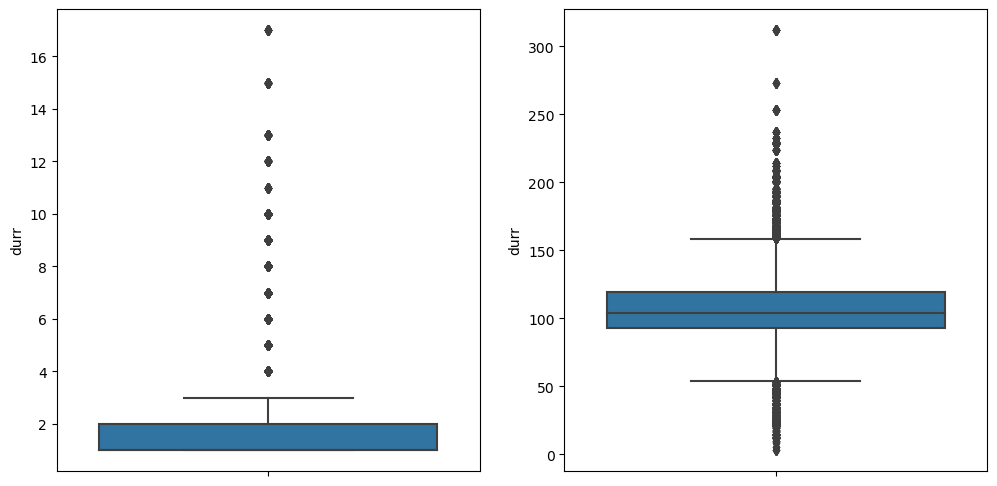

In [198]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = df_temp[df_temp["type"] == "TV Show"] , y = "durr")
plt.subplot(1,2,2)
sns.boxplot(data = df_temp[df_temp["type"] == "Movie"] , y = "durr")

### Observations

1. After unnesting we have total of <b> 2,01,991 </b> rows
2. The data suggests "Alfred Molina" is the most popular Actors among 39296 unique Actors, 
3. "Martin Scorsese is the most popular director amonng 5120 uniques directors
4. We have significantly larger missing values in Director (Around 30%, Cast (9%), and Country (9%) that need to be treated
5. Outliers are present in the dataset

## 6. Insights based on Non-Graphical and Visual Analysis <a id = ""></a>

<font color = "green" >

1. There are unique 8,807 movies/tv shows in the Netflix dataset.
2. A majority of the dataset consists of categorical data.
3. Around 70% of the content is Movies, and another 30% is TV Shows.
4. The maximum number of seasons for any TV Show is 17 for "Grey's Anatomy."
5. TV Shows are on an average of 2 seasons.
6. The number of Short Duration Films is 487, and the Number of Long Duration Movies is 5,673
7. The number of Movies released yearly has increased exponentially in the last two decades.
8. After 2014, there was a considerable increase in the content added to the platform.
9. There has been no significant and noticeable increase in TV Shows compared to Movies in recent years.
10. Most of the movies and TV shows released in December, July, and September
11. We do not have any such data which suggests whether releasing the show in that particular month was successful. Thus, it can't be concluded that releasing a show for a specific month will have a better chance of getting better customer engagement.
12. "International Movies", "Comedy", and "Drama" are the most favoured content type.
13. USA and India are top contributors in terms of content addition on Netflix
14. Rajiv Chilaka - Julie Tejwan have done the most 19 movies together
15. Rajiv Chilaka has directed most of the movies - 22
16. Anupam Kher is the most popular movie actor - part of 42 movies.
17. Takahiro Sakurai is the most popular TV actor - part of 25 TV shows.
18. Alastair Fothergill, popular director for TV shows
19. The most content type on Netflix is movies.
20. Most Netflix content is made with a "TV-MA" rating.


##  7. Business Insights <a id = "10"></a>

<font color = "green">
1. Netflix's majority of the content comes from the USA.
2. In the last couple of years, the exponential growth in terms of content has slowed down
3. Majority of the TV show content is of 2 seasons, Netflix can look to see if they can increase. This could help increasing customer engageemnt.


## 8. Recommendations <a id = "11"></a>

<font color = "green">
    
1. Netflix's majority of the content comes from the USA. Thus Netflix look to see content from other localities. 
2. In the last couple of years, the exponential growth in terms of content has slowed down. Netflix should try seeing adding more content from different localities.  
3. Majority of the TV show content is of 2 seasons, Netflix can look to see if they can increase. This could help increasing customer engageemnt.


In [201]:
my_list = [123,456,789]
new_list = [sum(int(digit) for digit in str(num))for num in my_list]

new_list

[6, 15, 24]

In [204]:
s = "leetcode"

vowels = ["a", "e", "i", "o", "u", "A", "E", "I", "O", "U"]

l = 0
r = len(s)-1
while l < r:
    while (l<r) and (s[l] not in vowels):
        l +=1
        print(l)
    while (r > l) and (s[r] not in vowels):
        r -= 1
        print(r)
    s[l], s[r] = s[r], s[l]

    l += 1
    r -= 1
print("".join(s))

In [205]:
l

0

In [206]:
r

-1

In [207]:
s = "leetcode"
list(s)

['l', 'e', 'e', 't', 'c', 'o', 'd', 'e']